# R2 Hesaplaması

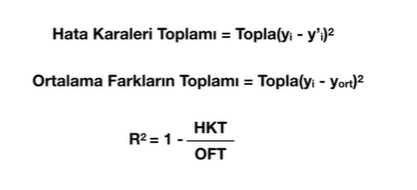

**R^2 genel olarak bu denkleme göre bulunur. Bizim Regresyon metodumuzun ne kadar doğru olduğunu bulmamızı sağlar.**

**Tahminlerin ne kadarı başarılı? bu başarı oranı nedir? Amacımız bunu bulmak**

**Eğer tüm değerler doğru tahmin edilseydi, gerçek değer ve tahmin değer arasında tablo yaparsak düzgün bir doğru olduğunu görürürüz. Ancak hata varsa doğru düzgün olmaz. Bu düzgün olmayan doğrudaki sapmalar ise hata olarak değerlendirilir ve bizim r^2 değerini bulmamızı sağlar**

**Ortalama farkların toplamı = (tahmin değeri-tahmin değerlerinin ortalaması)^2**

**Eğer r2 (-) değere düşerse algoritmamız çok çok kötü demektir. 0 bizim görmek istediğimiz en kötü değerdir. En mükemmel durum ise 1 olması durumudur! Tabi bu durum da çok zordur**



**Bazen sisteme olumlu katkısı olan bir şey yapıyor olmamıza rağmen r2 bizim bu olumlu durumumuzu gölgeleyebiliyor.**

**Olumlu bir düzeltme yaptığımızda r2 değeri artar ancak olumsuz bir şey yaptığımızda azalmaz, etki etmez gibi gözükür. Bunu düzeltmek için yeni bir formül kullanabiliriz. R2'ye göre daha sağlıklı seçim yapmamızı sağlayan veriler verebilir.**


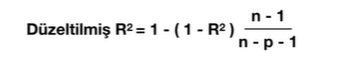

In [3]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv("maaslar-yeni.csv")
data

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [31]:
#ID alınmamaya özen gösterilir çünkü makine ezberler sıkıntı olur!
#Unvan seviyesi varken unvana gerek yok. Eğer olmasaydı unvan sütununu encode edecektik!
x = data.iloc[:, 2:-1]
y = data.iloc[:, -1:]
x

,UnvanSeviyesi,Kidem,Puan
0,1,5,70
1,2,5,70
2,3,5,70
3,4,5,70
4,5,5,70
5,6,5,70
6,7,5,70
7,8,5,70
8,9,5,70
9,10,5,70


In [32]:
#Multiple Linear Regression
lr = LinearRegression()
lr.fit(x, y)
lr.predict([[10, 5, 70]])

array([[26627.63731879]])

In [40]:
model = sm.OLS(lr.predict(x), x).fit()
print(model.summary())

#yüksek çıkan x2 ve x3'ü almasak sadece x1 ile çalışsak r2 ne olur?

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    8.38e-14
Time:                        11:53:50   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [48]:
x1 = x.iloc[:, 0:1]
lr.fit(x1, y)
model = sm.OLS(lr.predict(x1), x1).fit()
print(model.summary())

#r2 değeri arttı o zaman x2 ve x3 sistemi olumsuz etkiliyormuş

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.93e-19
Time:                        11:57:03   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [59]:
#Polynomial Regression
pr = preprocessing.PolynomialFeatures(degree=4)
x_poly = pr.fit_transform(x1)
lr2 = LinearRegression()
lr2.fit(x_poly, y)

model2 = sm.OLS(lr2.predict(x_poly), x1).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              91.39
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.82e-10
Time:                        12:12:21   Log-Likelihood:                         -311.94
No. Observations:                  30   AIC:                                      625.9
Df Residuals:                      29   BIC:                                      627.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [92]:
#svr tahmini
sc = preprocessing.StandardScaler()
x_olcek = sc.fit_transform(x1)
sc1 = preprocessing.StandardScaler()
y_olcek = sc1.fit_transform(y)

svr = SVR('rbf')
svr.fit(x_olcek, y_olcek.ravel())


model3 = sm.OLS(svr.predict(x_olcek), x_olcek).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    9.11e-11
Time:                        12:58:52   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\beray\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=rbf as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [64]:
#decision tree

dc = DecisionTreeRegressor(random_state=0)
dc.fit(x1, y)
model4 = sm.OLS(dc.predict(x1), x1).fit()
print(model4.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    3.01e-10
Time:                        12:18:18   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [66]:
#random forest
rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(x1, y.values.ravel())
model5 = sm.OLS(rfr.predict(x1), x1).fit()
print(model5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.75e-09
Time:                        12:44:03   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Tüm Değerler

In [71]:
#Şimdi ise tek x1 ile değil, tüm değerleri içine alacak şekilde model oluşturalım!
lr3 = LinearRegression()
lr3.fit(x, y)
model6 = sm.OLS(lr3.predict(x), x).fit()
print(model6.summary())

#3 parametrede düşüyor

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    8.38e-14
Time:                        12:51:07   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [73]:
#Polynomial 
lr4 = LinearRegression()
pr2 = preprocessing.PolynomialFeatures(degree=4)
lr4.fit(pr2.fit_transform(x), y)
model7 = sm.OLS(lr4.predict(pr2.fit_transform(x)), x).fit()
print(model7.summary())

#3 parametrede düşüyor

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    7.49e-07
Time:                        12:52:35   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [89]:
#SVR
svr1 = SVR('rbf')
sc2 = preprocessing.StandardScaler()
x_olcek1 = sc2.fit_transform(x)
sc3 = preprocessing.StandardScaler()
y_olcek1 = sc3.fit_transform(y)

svr1.fit(x_olcek1, y_olcek1.ravel())
model8 = sm.OLS(svr1.predict(x_olcek1), x_olcek1).fit()
print(model8.summary())

#3 parametrede yükseliyor

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              32.37
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    4.34e-09
Time:                        12:58:09   Log-Likelihood:                        -0.92453
No. Observations:                  30   AIC:                                      7.849
Df Residuals:                      27   BIC:                                      12.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\beray\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=rbf as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [82]:
#decision tree
dc1 = DecisionTreeRegressor(random_state=0)
dc1.fit(x, y)
model9 = sm.OLS(dc1.predict(x), x).fit()
print(model9.summary())

#3 parametrede düşüyor

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    7.62e-07
Time:                        12:56:16   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [87]:
#random forest
rdr1 = RandomForestRegressor(random_state=0, n_estimators=10)
rdr1.fit(x, y.values.ravel())
model10 = sm.OLS(rdr1.predict(x), x).fit()
print(model10.summary())

#3 parametrede düşüyor

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              22.31
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.79e-07
Time:                        12:57:40   Log-Likelihood:                         -316.07
No. Observations:                  30   AIC:                                      638.1
Df Residuals:                      27   BIC:                                      642.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Korelasyon İlişkisi Görme

**Köşegen matriksi denebilir. Mesela unvan seviyesi ile maas arasındaki ilişkiyi görebiliriz(%72). Kendisiyle ilişkisi 1(%100)'dir.**


**Buradan maaş kolonu için kıdem ve puan'ın ne kadar az etki verdiğini görebiliriz. Parametre seçerken hangi kolonlar arasında daha net ilişki var, hangi kolondan hangi kolonu tahmin etmek daha kolay gibi bilgileri öğrenip karar verebiliriz.**

In [95]:
print(data.corr())

               Calisan ID  UnvanSeviyesi     Kidem      Puan      maas
Calisan ID       1.000000       0.331847  0.206278 -0.251278  0.226287
UnvanSeviyesi    0.331847       1.000000 -0.125200  0.034948  0.727036
Kidem            0.206278      -0.125200  1.000000  0.322796  0.117964
Puan            -0.251278       0.034948  0.322796  1.000000  0.201474
maas             0.226287       0.727036  0.117964  0.201474  1.000000


# Baktığımızda Lineer Regresyonu kullanmamız bize daha doğru sonuç verecek, bunu görebiliriz. Ancak 3 kolon yerine sadece ilk kolonu kullanıp maaş tahmini yaparsak tahmin sonucumuzun doğruluğu artacak!